In [1]:
import re
import pickle

import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

from my_utils import *

In [2]:
eval_manager_path = "..\\..\\explainability\GRETEL-repo\\output\\eval_manager\\"
embeddings_path = "..\\..\\explainability\GRETEL-repo\\output\\embeddings\\"

In [3]:
# Load eval_manager

most_recent_file_name = get_most_recent_file(eval_manager_path)
print(most_recent_file_name)

with open(eval_manager_path + most_recent_file_name, 'rb') as f:
    eval_manager = pickle.load(f)

12200-Martina.pkl


In [4]:
def evaluate_ALL(eval_manager):
    s = eval_manager._evaluators[0]

    instances = []
    counterfactuals = []

    for inst in s.dataset.instances :
        instances.append(inst)
        print(f"Evaluating instance with id {inst.id}")

        for metric in s._evaluation_metrics:
            if(metric._special):
                _, counterfactual = metric.evaluate(inst, None, s._oracle,s._explainer,s._data)
                counterfactuals.append(counterfactual)
    
    return {'instances': instances,
            'counterfactuals': counterfactuals}

x = evaluate_ALL(eval_manager)

Evaluating instance with id 0
Evaluating instance with id 1
Evaluating instance with id 2
Evaluating instance with id 3
Evaluating instance with id 4
Evaluating instance with id 5
Evaluating instance with id 6
Evaluating instance with id 7
Evaluating instance with id 8
Evaluating instance with id 9
Evaluating instance with id 10
Evaluating instance with id 11
Evaluating instance with id 12
Evaluating instance with id 13
Evaluating instance with id 14
Evaluating instance with id 15
Evaluating instance with id 16
Evaluating instance with id 17
Evaluating instance with id 18
Evaluating instance with id 19
Evaluating instance with id 20
Evaluating instance with id 21
Evaluating instance with id 22
Evaluating instance with id 23
Evaluating instance with id 24
Evaluating instance with id 25
Evaluating instance with id 26
Evaluating instance with id 27
Evaluating instance with id 28
Evaluating instance with id 29
Evaluating instance with id 30
Evaluating instance with id 31
Evaluating instanc

{'instances': [<src.dataset.instances.graph.GraphInstance at 0x22eed5a5af0>,
  ...],
 'counterfactuals': [<src.dataset.instances.graph.GraphInstance at 0x22ede004250>,
  ...]}

In [ ]:
with open("prova.pkl", "wb") as f:
    pickle.dump(x, f)

## ___________________________________________________________________________________________

In [ ]:
import pickle
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [38]:
with open("prova.pkl", "rb") as f:
    x = pickle.load(f)

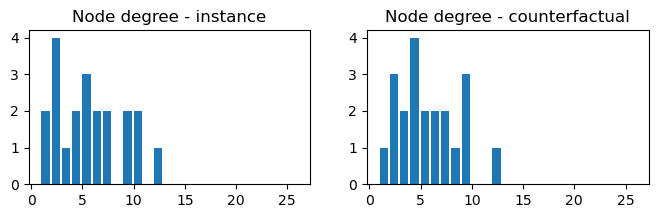

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(8,2))

def update(i):
    num = 25
    
    for ax in axs:
        ax.clear()
    
    axs[0].hist(x['instances'][i].data.sum(axis=0), bins=range(1, num + 2), width=0.8)
    axs[1].hist(x['counterfactuals'][i].data.sum(axis=0), bins=range(1, num + 2), width=0.8)

    axs[0].set_title('Node degree - instance')
    axs[1].set_title('Node degree - counterfactual')
    
ani = FuncAnimation(fig, update, frames=10, interval=300, repeat=False)
HTML(ani.to_jshtml())